# MACHINE LEARNING 
# BONUS

**SUDARSAN HARIDAS**

**300353099**

### References

* Lab01
* Lab02
* Class work

* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* https://matplotlib.org
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
* https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
* https://machinelearningmastery.com/data-preparation-without-data-leakage/
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
* https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

**LIBRARY IMPORT AND DATA PREPARATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

#imports all libraries and models necessary to run the project...

In [2]:
df = pd.read_csv('dataset/Lab02_prepared.csv')
#reads the csv file placed inside 'dataset' folder....

df_copy = df.copy()
#holding a copy of original dataset...

df.head()
#displays first 5 rows of the dataset...

,avg_rating,last_updated,lectures,duration,cost,discount,inst_rating,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,business,design,development,it_software,marketing,office_productivity,personal_development,teaching_academics
0,4.2,20.0,162.0,1163.0,23.99,90.0,4.2,10.913833,8.754792,9.507032,12.096855,0,1,0,0,0,0,0,0
1,4.6,18.0,37.0,234.0,16.99,56.0,4.5,10.785994,9.135832,12.413123,13.951623,1,0,0,0,0,0,0,0
2,4.6,20.0,53.0,314.0,23.99,91.0,4.6,9.962652,8.829665,9.903188,10.926334,0,0,1,0,0,0,0,0
3,4.6,20.0,51.0,570.0,21.99,88.0,4.6,13.484116,11.186128,11.228545,13.530335,0,0,1,0,0,0,0,0
4,4.5,20.0,41.0,428.0,19.99,88.0,4.5,9.565915,7.946971,9.386225,10.890423,0,0,0,0,0,1,0,0


In [3]:
df.drop('business', axis = 1 , inplace = True)

df_copy.drop('business', axis = 1 , inplace = True)

#Having not dropped first column while creating dummy variables..
#having first column after creation of dummy, overfits the regression...

In [4]:
print(df.info())

#displays information about all columns in the dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_rating            1904 non-null   float64
 1   last_updated          1904 non-null   float64
 2   lectures              1904 non-null   float64
 3   duration              1904 non-null   float64
 4   cost                  1904 non-null   float64
 5   discount              1904 non-null   float64
 6   inst_rating           1904 non-null   float64
 7   log_enrollment        1904 non-null   float64
 8   log_number_ratings    1904 non-null   float64
 9   log_inst_review       1904 non-null   float64
 10  log_inst_student      1904 non-null   float64
 11  design                1904 non-null   int64  
 12  development           1904 non-null   int64  
 13  it_software           1904 non-null   int64  
 14  marketing             1904 non-null   int64  
 15  office_productivity  

In [5]:
print(df.shape)

#The dataset has 19 columns and 1904 rows...

(1904, 18)


**EXPLORATORY DATA ANALYSIS**

In [6]:
print(df.describe())

#prints numerical summary statistics of all columns in the dataset....

        avg_rating  last_updated     lectures     duration         cost  \
count  1904.000000   1904.000000  1904.000000  1904.000000  1904.000000   
mean      4.429989     19.247374   105.777311   711.383929    23.440494   
std       0.220873      1.289532   100.661688   791.256243    20.229219   
min       3.500000     11.000000     5.000000    30.000000    16.990000   
25%       4.300000     19.000000    44.000000   260.750000    16.990000   
50%       4.500000     20.000000    74.000000   469.500000    19.990000   
75%       4.600000     20.000000   125.000000   854.000000    21.990000   
max       4.900000     20.000000   699.000000  9840.000000   200.047070   

          discount  inst_rating  log_enrollment  log_number_ratings  \
count  1904.000000  1904.000000     1904.000000         1904.000000   
mean     78.618697     4.433351        9.175319            7.382198   
std      16.429777     0.184889        1.358188            1.357295   
min      30.000000     3.800000        3

In [7]:
print(df.corr())

#prints the correlation values of all columns in the dataset...

                      avg_rating  last_updated  lectures  duration      cost  \
avg_rating              1.000000      0.018219  0.022501 -0.023934 -0.067714   
last_updated            0.018219      1.000000  0.098230  0.107675 -0.029611   
lectures                0.022501      0.098230  1.000000  0.763369  0.005304   
duration               -0.023934      0.107675  0.763369  1.000000  0.002977   
cost                   -0.067714     -0.029611  0.005304  0.002977  1.000000   
discount               -0.000337      0.064725 -0.023041 -0.000544  0.039650   
inst_rating             0.748984      0.047368  0.044914  0.016353 -0.032610   
log_enrollment          0.347010      0.002947  0.042484  0.026043 -0.032963   
log_number_ratings      0.346894      0.014023  0.054885  0.036600 -0.038620   
log_inst_review         0.286643      0.046616  0.061280  0.049687 -0.027733   
log_inst_student        0.223822      0.032605  0.058874  0.049638 -0.023185   
design                  0.048463      0.

Text(0.5, 1, 'Correlation Matrix Heatmap')

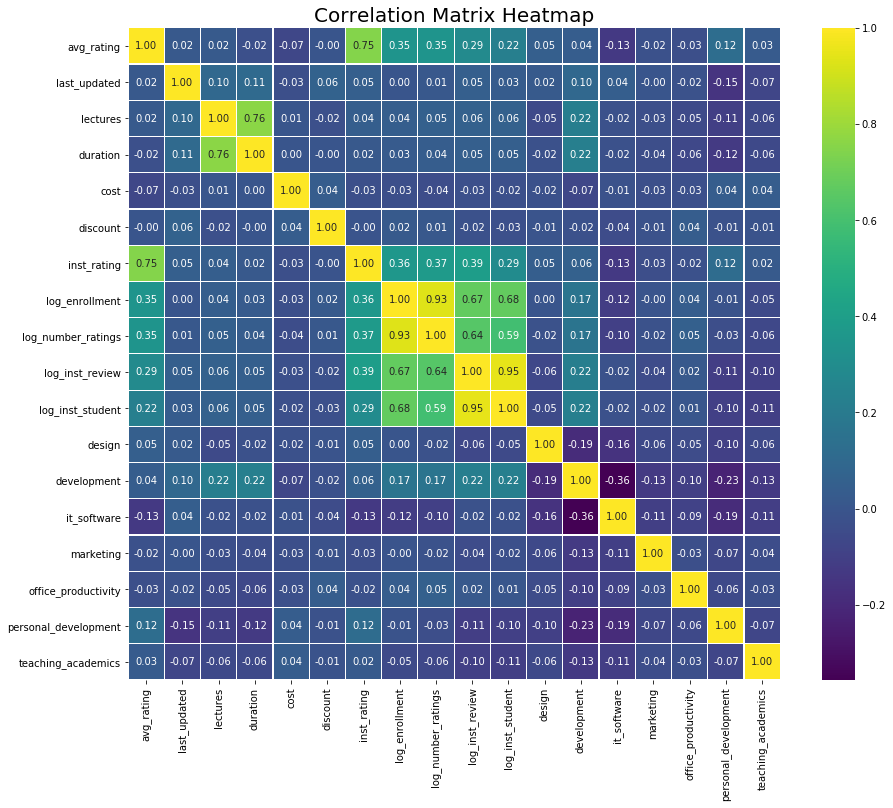

In [8]:
df_corr_matrix = df.corr()
#saves the correaltion matrix in a new dataframe...


plt.figure(figsize = (15,12))
sns.heatmap(df_corr_matrix, annot = True,square = True , fmt = ".2f", linewidth = 0.2, cmap = "viridis")
plt.tick_params(labelsize = 10)
plt.title("Correlation Matrix Heatmap", fontsize = 20)

#plots heatmap using the correlation matrix...

#the lighter colours have higher correaltion values than darker colours...

UNIVARIATE ANALYSIS

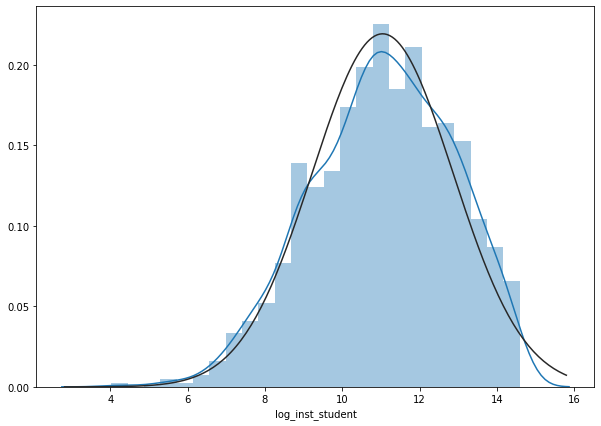

In [9]:
plt.figure(figsize = (10,7))
sns.distplot(df.log_inst_student, fit = norm)

#plots the distribution of 'log_inst_student' column...

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb18f4856d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb18f471a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb18f597d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb18f496c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb18f485d10>],
 'means': []}

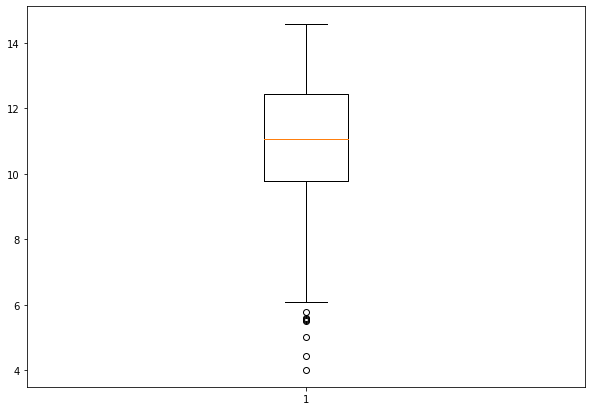

In [10]:
plt.figure(figsize = (10,7))
plt.boxplot(df.log_inst_student)

#plots the whisker plot of 'log_inst_student' column...

**Observations**

    - Looking at the distribution, the data is slightly skewed ...
    - Further verifying by looking at boxplot, there are a few outliers in that column...

In [11]:
df.drop(df.loc[df['log_inst_student'] < 7].index, inplace = True)

#drops all rows where 'log_inst_student' column is less than 7...

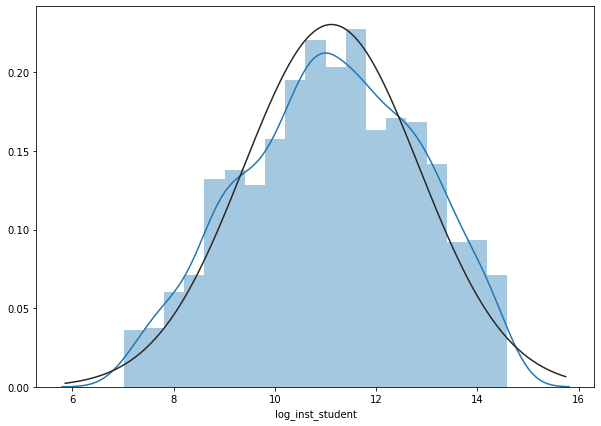

In [12]:
plt.figure(figsize = (10,7))
sns.distplot(df.log_inst_student, fit = norm)

#plots the distribution of 'log_inst_student' column...

#Now the data is not skewed...

MULTIVARIATE ANALYSIS

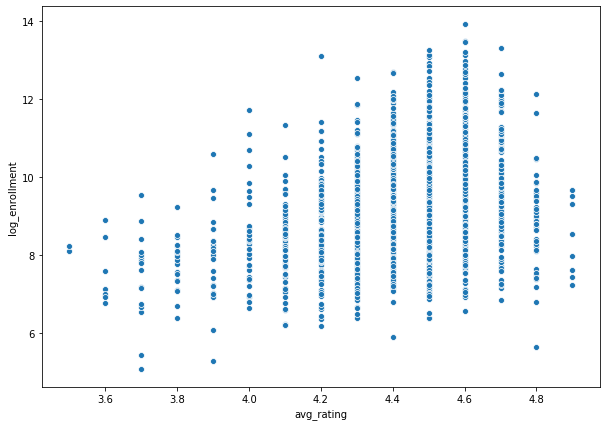

In [13]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'avg_rating', y = 'log_enrollment')
plt.show()

#plots scatter plot between 'log_inst_review' and 'log_enrollment'...

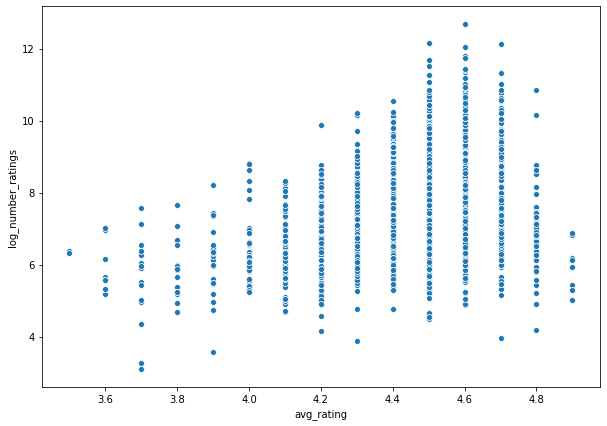

In [14]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'avg_rating', y = 'log_number_ratings')
plt.show()

#plots scatter plot between 'log_inst_review' and 'log_number_ratings'...

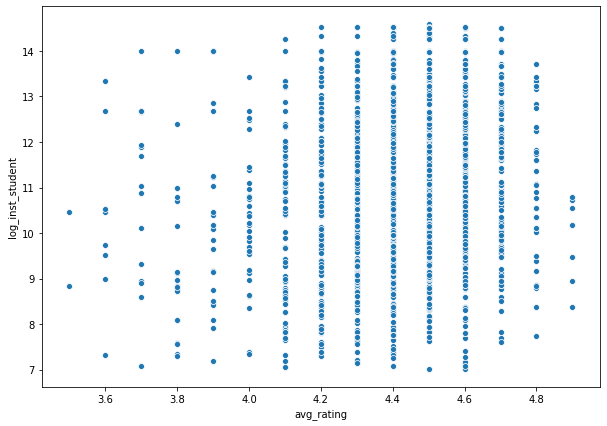

In [15]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'avg_rating', y = 'log_inst_student')
plt.show()

#plots scatter plot between 'log_inst_review' and 'log_inst_student'...

**FEATURE SELECTION**

In [16]:
df_feature_selection = df.copy()
#copy of dataframe for feature selection...

target = df_feature_selection.avg_rating
#target column...


features = df_feature_selection.drop('avg_rating', axis = 1)
#feature columns...

In [17]:
%run functions/Functions_SHa53099.ipynb

#Runs the Functions notebook to access the defined functions in this project...

Correlation Based Selection

In [18]:
df_correlation = select_manual(df_feature_selection, 0.2)

df_correlation.drop('avg_rating', axis = 1, inplace = True)

df_correlation.head()

#calls the manual selection method selects features based on correlation value threshold...
#selects 6 features...

,log_inst_student,log_enrollment,log_number_ratings,inst_rating,development
0,12.096855,10.913833,8.754792,4.2,0
1,13.951623,10.785994,9.135832,4.5,0
2,10.926334,9.962652,8.829665,4.6,1
3,13.530335,13.484116,11.186128,4.6,1
4,10.890423,9.565915,7.946971,4.5,0


Variance Threshold Selection

In [19]:
df_variance = select_variance(features, 3)

df_variance.head()


#we use 'features' df because we do not need the target column here...
#calls the variance threshold selection method...
#selects 8 features...
#printing variance value and selection status for visual confirmation...

                           Variance  Selection_status
last_updated               1.661895             False
lectures               10242.351871              True
duration              629315.179205              True
cost                     411.817585              True
discount                 272.164839              True
inst_rating                0.033405             False
log_enrollment             1.707007             False
log_number_ratings         1.749190             False
log_inst_review            3.331182              True
log_inst_student           3.001323              True
design                     0.070416             False
development                0.210679             False
it_software                0.177537             False
marketing                  0.035428             False
office_productivity        0.024932             False
personal_development       0.096917             False
teaching_academics         0.037398             False


,lectures,duration,cost,discount,log_inst_review,log_inst_student
0,162.0,1163.0,23.99,90.0,9.507032,12.096855
1,37.0,234.0,16.99,56.0,12.413123,13.951623
2,53.0,314.0,23.99,91.0,9.903188,10.926334
3,51.0,570.0,21.99,88.0,11.228545,13.530335
4,41.0,428.0,19.99,88.0,9.386225,10.890423


Select K-Best Method

In [20]:
df_selKBest = select_best(df_feature_selection, 9)

df_selKBest.drop('avg_rating', axis = 1, inplace = True)

#As function is written with 'log_inst_review' as target

df_selKBest.head()

#calls the select K-Best method and returns specified number of features...
#here we select 9 features...

,inst_rating,log_enrollment,log_number_ratings,log_inst_student,design,development,personal_development,teaching_academics
0,4.2,10.913833,8.754792,12.096855,1,0,0,0
1,4.5,10.785994,9.135832,13.951623,0,0,0,0
2,4.6,9.962652,8.829665,10.926334,0,1,0,0
3,4.6,13.484116,11.186128,13.530335,0,1,0,0
4,4.5,9.565915,7.946971,10.890423,0,0,0,0


**LINEAR REGRESSION MODELS WITH FEATURE SELECTION, FEATURE TRANSFORMATION AND SCALING**

In [21]:
featureSelection_list = []
featureTransform_list = []
rSquared_list = []
rootMeanSquaredError_list = []

#creating empty lists to store the results of different combinations of regression models...

In [22]:
selected_features_list = [df_correlation, df_variance, df_selKBest]

#we make a list of selected features to loop through different combinations of feature selection and scaling... 

In [23]:
for i, df in enumerate(selected_features_list):
    for j in range(2):
        
        if(i == 0):
            featureSelection_list.append("Correlation")
            
        elif(i == 1):
            featureSelection_list.append("Variance")
        
        else:
            featureSelection_list.append("SelKBest")
        
        
        if(j == 0):
            featureTransform_list.append("None")
            
        else:
            
            df = make_poly(df)
            featureTransform_list.append("Poly 2 interaction")
            
            
        r2, rmse = regression_call(df, target)
        
        rSquared_list.append(r2)
        
        rootMeanSquaredError_list.append(rmse)
            

            
#We loop through all three feature selection methods and also feature transformation 
#append the error metrics...

**LINEAR REGRESSION MODEL WITH RIDGE**

In [24]:
alpha_list = 10 ** np.linspace(10, -10 ,50)

#50 equally spaced values from 10 to -10 is created using linspace function
#alpha is 10 raised to the power of values from that list
#Ridge regression takes alpha values 10^n to 1... 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

#split training and test data as required (75:25)

In [26]:
ridge_rmse_list = []

ridge_r2_list = []

ridge_list = []

for alpha in alpha_list:
    
    ridge_model = Ridge(alpha = alpha, max_iter = 10000)
    ridge_model.fit(x_train, y_train)
    
    y_pred = ridge_model.predict(x_test)
    
    ridge_r2_list.append( ridge_model.score(x_train, y_train) )
    
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    ridge_rmse_list.append(rmse)
    
    ridge_list.append(ridge_model)
    
ridge_model_result = np.vstack((alpha_list, ridge_rmse_list, ridge_r2_list)).T

ridge_df = pd.DataFrame(ridge_model_result, columns = ["Alpha", "RMSE", "R2"])


#Create lists to score metrics for all different alpha values of ridge model...
#loop through all alpha values for ridge model and append metrics
#vstack converts the lists into array and then we transpose it
#create dataframe with all metrics and alpha values to sort and choose best alpha value...

In [27]:
ridge_df[ridge_df.RMSE == ridge_df.RMSE.min()]

#Choose minimum RMSE value...

,Alpha,RMSE,R2
24,1.599859,0.148854,0.585722


In [28]:
featureSelection_list.append("Ridge, alpha = " + 
                             str(ridge_df[ridge_df.RMSE == ridge_df.RMSE.min()]['Alpha']).split()[1])


featureTransform_list.append("None")

rSquared_list.append(float(str(ridge_df[ridge_df.RMSE == ridge_df.RMSE.min()]['R2']).split()[1]))

rootMeanSquaredError_list.append(float(str(ridge_df[ridge_df.RMSE == ridge_df.RMSE.min()]['RMSE']).split()[1]))

#We append all the values from the best ridge model into the prepared lists...

**PLOT AND SUMMARY ANALYSIS**

In [29]:
regression_dict = {'Feature Selection' : featureSelection_list, 'Feature Trasnformation' : featureTransform_list,
                  'R2' : rSquared_list, 'RMSE': rootMeanSquaredError_list}

regression_df = pd.DataFrame(regression_dict)

#we make a dictionary with all preapred lists and make a dataframe with it

In [30]:
regression_df

,Feature Selection,Feature Trasnformation,R2,RMSE
0,Correlation,None,0.541695,0.148499
1,Correlation,Poly 2 interaction,0.561605,0.145237
2,Variance,None,0.092487,0.208964
3,Variance,Poly 2 interaction,0.090735,0.209166
4,SelKBest,None,0.534966,0.149585
5,SelKBest,Poly 2 interaction,0.546244,0.147760
6,"Ridge, alpha = 1.599859",None,0.585722,0.148854


In [31]:
regression_df.sort_values(by = ['R2','RMSE'], ascending = [False, True]).head(1)

,Feature Selection,Feature Trasnformation,R2,RMSE
6,"Ridge, alpha = 1.599859",None,0.585722,0.148854


Looking at the above results, **Select K best** feature selection and **Polynomial** feature transformation gives the least value for RMSE and best value for R2.

We re-run the same model to recreate the results and scatter plot (predicted value vs given value)

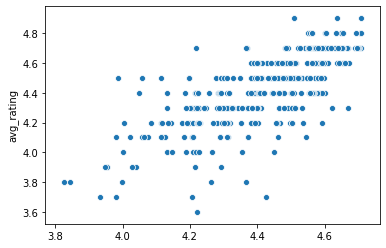

In [32]:
poly_features = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
df_selKBest_transformed = poly_features.fit_transform(df_selKBest)

x_train, x_test, y_train, y_test = train_test_split(df_selKBest_transformed, target, 
                                                    test_size = 0.25, random_state = 42)
    
x_train = data_scaling(x_train)
x_test = data_scaling(x_test)
    
bestLinearModel = LinearRegression()
    
bestLinearModel.fit(x_train, y_train)
    
y_pred = bestLinearModel.predict(x_test)
    
sns.scatterplot(y_pred, y_test)

In [33]:
print(pd.Series(bestLinearModel.coef_, index = poly_features.get_feature_names()))

#Print the regression coefficients of each feature..

x0       0.169317
x1       0.208497
x2      -0.373973
x3       0.236375
x4      -0.004498
x5      -0.031077
x6       0.218670
x7      -0.107444
x0 x1   -0.095747
x0 x2    0.395335
x0 x3   -0.284778
x0 x4   -0.031229
x0 x5    0.002886
x0 x6   -0.168153
x0 x7    0.123469
x1 x2   -0.126704
x1 x3   -0.119043
x1 x4    0.119988
x1 x5    0.101477
x1 x6    0.060176
x1 x7   -0.024888
x2 x3    0.165589
x2 x4   -0.088432
x2 x5   -0.046390
x2 x6   -0.086754
x2 x7   -0.017823
x3 x4    0.006565
x3 x5   -0.027997
x3 x6   -0.011478
x3 x7    0.030003
x4 x5    0.000000
x4 x6    0.000000
x4 x7    0.000000
x5 x6    0.000000
x5 x7    0.000000
x6 x7    0.000000
dtype: float64


We lose column names as Polynomial transformation is carried out...

After scaling and transforming the data, no column is given a large weightage and some have no weightage at all.


**Thoughts about the model**

The best performing model, after scaling and transformation of features, has very small coefficients of regression. And therefore the margin of error is significantly reduced unlike a model without scaling and transformation. Feature transformation such as polynomial features, helps the regression curve to fit the data better than being a straight line. Feature scaling, brings all features down to a similar scale, so features with different units that vary a lot would look very similar after scaling.

**OUT OF SAMPLE PREDICTION**

In [34]:
df_describe = df_feature_selection.describe()

synthentic_data1 = df_describe.iloc[4]
synthentic_data2 = df_describe.iloc[5]
synthentic_data3 = df_describe.iloc[6]

synthetic_df = pd.DataFrame([synthentic_data1, synthentic_data2, synthentic_data3])

synthetic_df.reset_index(inplace = True)
synthetic_df.drop('index',axis = 1 , inplace = True)

synthetic_df

#creating a synthetic dataframe to predict values

,avg_rating,last_updated,lectures,duration,cost,discount,inst_rating,log_enrollment,log_number_ratings,log_inst_review,log_inst_student,design,development,it_software,marketing,office_productivity,personal_development,teaching_academics
0,4.3,19.0,44.0,261.75,16.99,74.0,4.3,8.328028,6.499411,7.991928,9.891714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.5,20.0,74.0,469.50,19.99,86.0,4.5,9.205321,7.337250,9.386225,11.097800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.6,20.0,126.0,854.00,21.99,89.0,4.6,10.011287,8.193746,10.739934,12.449070,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
synthetic_features = synthetic_df[list(df_selKBest.columns)]

synthetic_target = synthetic_df.avg_rating

#separate the target and features (selected the same way as the best performing model)

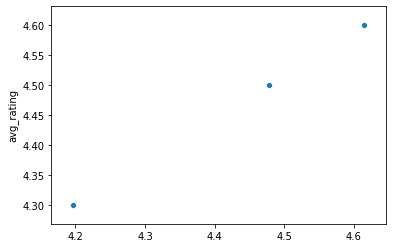

In [36]:
synthetic_features_transformed = poly_features.fit_transform(synthetic_features)
    
synthetic_features_transformed_scaled = data_scaling(synthetic_features_transformed)
    
synthetic_pred = bestLinearModel.predict(synthetic_features_transformed_scaled)
    
sns.scatterplot(synthetic_pred, synthetic_target)

#Predict using best model and compare with actual values...

In [37]:
synthetic_pred

#Predicted values...

array([4.19704303, 4.47778691, 4.61493552])

In [38]:
synthetic_target

#Actual values...

0    4.3
1    4.5
2    4.6
Name: avg_rating, dtype: float64